# 7. 인물사진 만들기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


## 인물

사진 준비하기

(1072, 1125, 3)


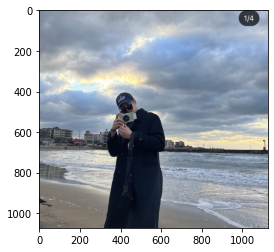

In [2]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fcfae22ab50>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

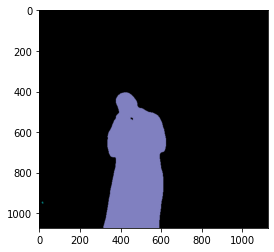

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  3, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bird
person


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

In [12]:
seg_color = (128,128,192)

시맨틱 세그멘테이션 다뤄보기

(1072, 1125)


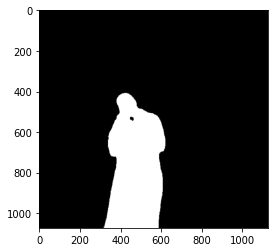

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

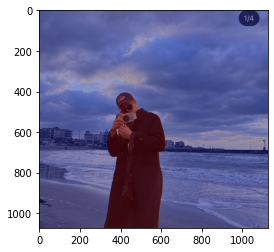

In [14]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

배경 흐리게 하기

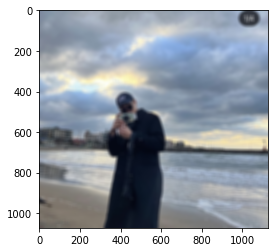

In [15]:
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

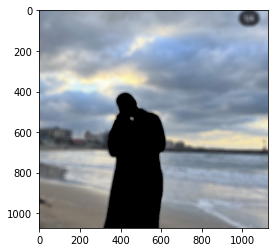

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

흐린 배경과 원본 영상 합성

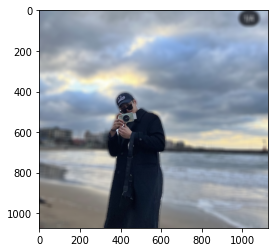

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 고양이

사진 준비하기

(981, 1123, 3)


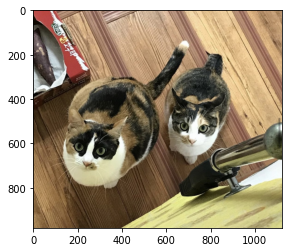

In [27]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/angkkodalbam.jpg'  
img_orig2 = cv2.imread(img_path2) 

print(img_orig2.shape)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)

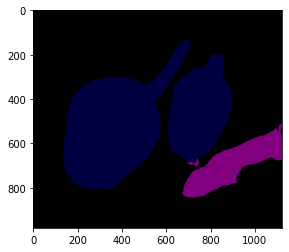

In [29]:
plt.imshow(output2)
plt.show()

In [30]:
segvalues2

{'class_ids': array([0, 5, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [31]:
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
cat


In [32]:
colormap[8]

array([64,  0,  0])

In [33]:
seg_color = (0,0,64)

시맨틱 세그멘테이션 다뤄보기

(981, 1123)


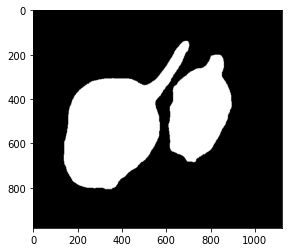

In [34]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map2 = np.all(output2==seg_color, axis=-1)
print(seg_map2.shape)
plt.imshow(seg_map2, cmap='gray')
plt.show()

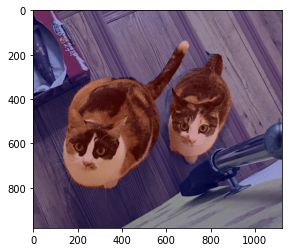

In [35]:
img_show2 = img_orig2.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask2 = seg_map2.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

배경 흐리게 하기

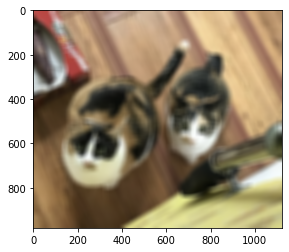

In [48]:
img_orig_blur2 = cv2.blur(img_orig2, (30,30))  
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

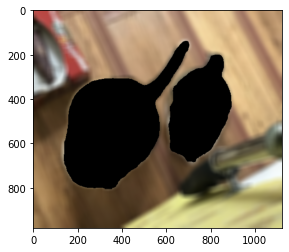

In [49]:
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

흐린 배경과 원본 영상 합성

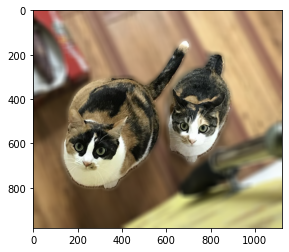

In [50]:
img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

## 기차

사진 준비하기

(543, 724, 3)


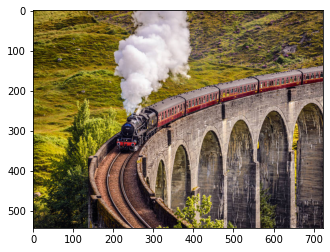

In [73]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/train.jpg'  
img_orig3 = cv2.imread(img_path3) 

print(img_orig3.shape)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

In [59]:
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

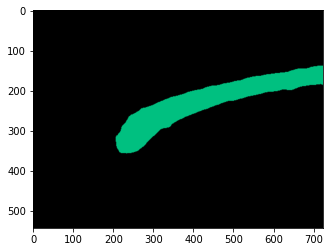

In [61]:
plt.imshow(output3)
plt.show()

In [62]:
segvalues3

{'class_ids': array([ 0, 19]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [63]:
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
train


In [65]:
colormap[19]

array([128, 192,   0])

In [67]:
seg_color3 = (0,192,128)

시맨틱 세그멘테이션 다뤄보기

(543, 724)


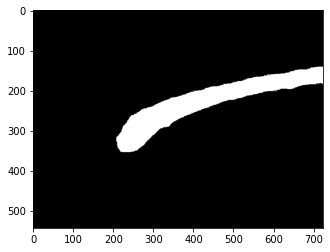

In [68]:
seg_map3 = np.all(output3==seg_color3, axis=-1)
print(seg_map3.shape)
plt.imshow(seg_map3, cmap='gray')
plt.show()

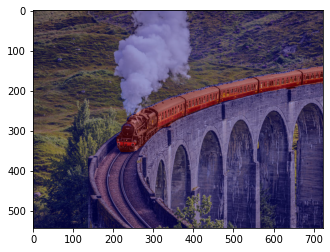

In [72]:
img_show3 = img_orig3.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask3 = seg_map3.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

배경 흐리게 하기

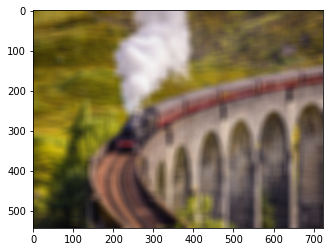

In [74]:
img_orig_blur3 = cv2.blur(img_orig3, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()

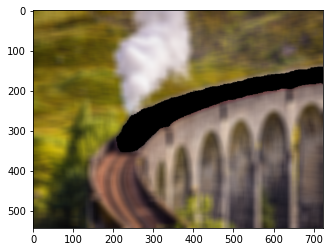

In [75]:
img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

흐린 배경과 원본 영상 합성

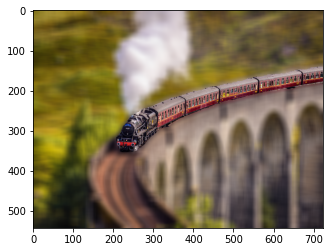

In [76]:
img_concat3 = np.where(img_mask_color3==255, img_orig3, img_bg_blur3)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

## 합성

사진 준비하기

(982, 1110, 3)


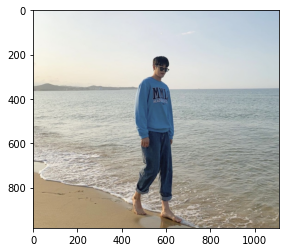

In [77]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/modelimage.jpg'  
img_orig4 = cv2.imread(img_path4) 

print(img_orig4.shape)
plt.imshow(cv2.cvtColor(img_orig4, cv2.COLOR_BGR2RGB))
plt.show()

In [79]:
segvalues4, output4 = model.segmentAsPascalvoc(img_path4)

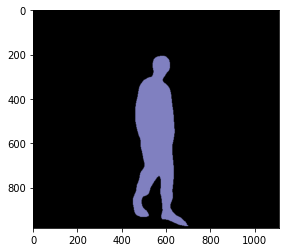

In [80]:
plt.imshow(output4)
plt.show()

In [81]:
segvalues4

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [82]:
for class_id in segvalues4['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [83]:
colormap[15]

array([192, 128, 128])

In [84]:
seg_color4 = (128,128,192)

(982, 1110)


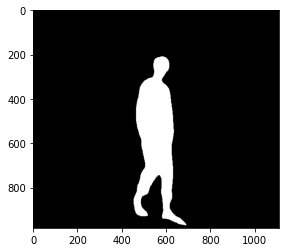

In [85]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map4 = np.all(output4==seg_color4, axis=-1)
print(seg_map4.shape)
plt.imshow(seg_map4, cmap='gray')
plt.show()

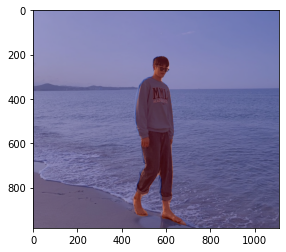

In [86]:
img_show4 = img_orig4.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask4 = seg_map4.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask4 = cv2.applyColorMap(img_mask4, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show4 = cv2.addWeighted(img_show4, 0.6, color_mask4, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))
plt.show()

In [111]:
img_mask_color4 = cv2.cvtColor(img_mask4, cv2.COLOR_GRAY2BGR)

(314, 559, 3)


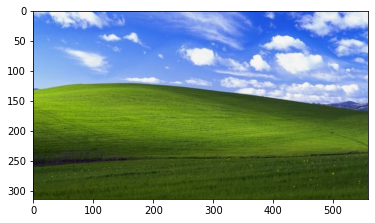

In [112]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/backgroundimage.jpg'  
img_orig5 = cv2.imread(img_path5) 

print(img_orig5.shape)
plt.imshow(cv2.cvtColor(img_orig5, cv2.COLOR_BGR2RGB))
plt.show()

In [113]:
img_orig4.shape

(982, 1110, 3)

In [114]:
res_img_org=cv2.resize(img_orig5,(1110,982))
res_img_org.shape

(982, 1110, 3)

배경과 사진 합성하기

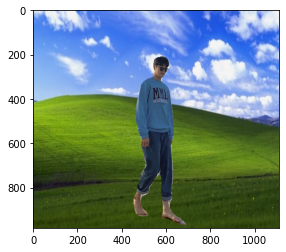

In [115]:
img_concat4 = np.where(img_mask_color4==255,img_orig4, res_img_org)
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.show()

## 문제점

1. 인물의 테두리를 따는 것이 깔끔하지 않음.
2. 경계가 조금 부자연스러움.

## 해결방법

1. 가우시안 블러 처리를 한다. 가우시안 블러는 이미지에 노이즈가 많은 경우 가우시안 흐림 효과로 그 노이즈를 완화할 수 있다. 경계선을 완화해 배경과 피사체의 경계를 그라데이션 효과를 줘서 경계 부분이 부드러워서 배경과 피사체가 자연스럽게 어울릴 수 있게 된다. 따라서 인물의 테두리가 깔끔하게 따지지 않아도 깔끔한 효과를 줄 수 있다.

2. 사진 자체가 깔끔하거나 테두리가 헷갈리지 않게 독사진으로 찍은 사진을 사용하는 방법이 있다.